Testing code
============

## Modern programming practices and science

* Researchers and scientific software developers write software daily, but few have been trained to do so
* Good programming practices make a BIG difference
* We can learn a lot from the development methods developed for commercial and open source software in the past 10 years


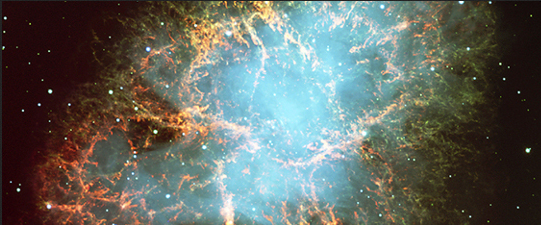

In [1]:
from IPython.display import Image
Image("images/pulsar.png")

## Requirements for scientific programming

* Main requirement: scientific code must be error free
* Scientist time, not computer time is the bottleneck
 * Being able to explore many different models and statistical analyses is more important than a very fast single approach
* Reproducibility and re-usability:
 * Every scientific result should be independently reproduced at least internally before publication (DFG, 1999)
 * Increasing pressure for making the source code used in publications available online (especially for theoretical papers)
 * No need for somebody else to re-implement your algorithm 

## Effect of software errors in science

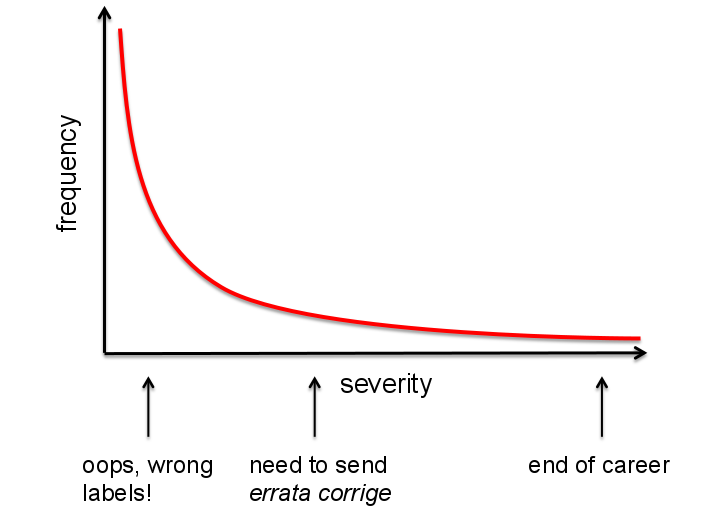

In [2]:
Image("images/errors_in_science.png", height=400, width=400)

## Software bugs in research are a serious business

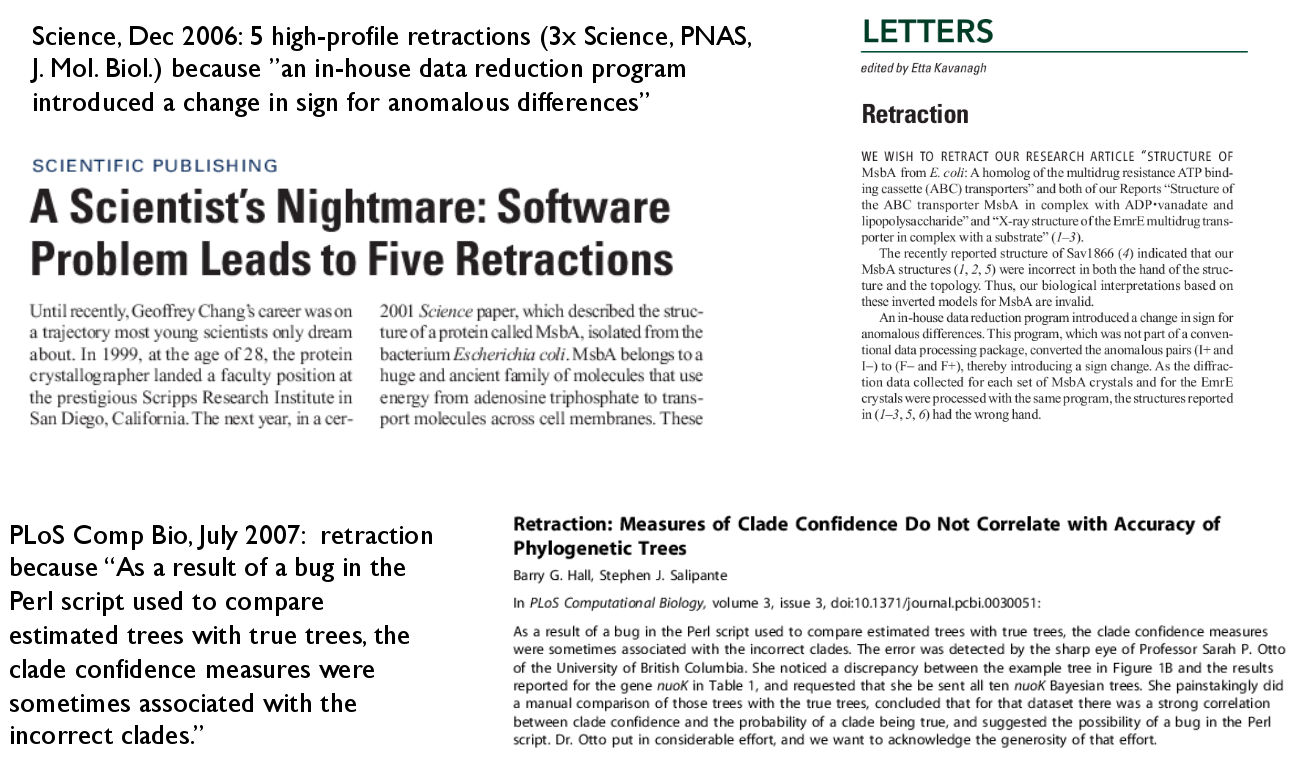

In [3]:
Image("images/software_bugs_in_research.png")

## The basic agile development cycle

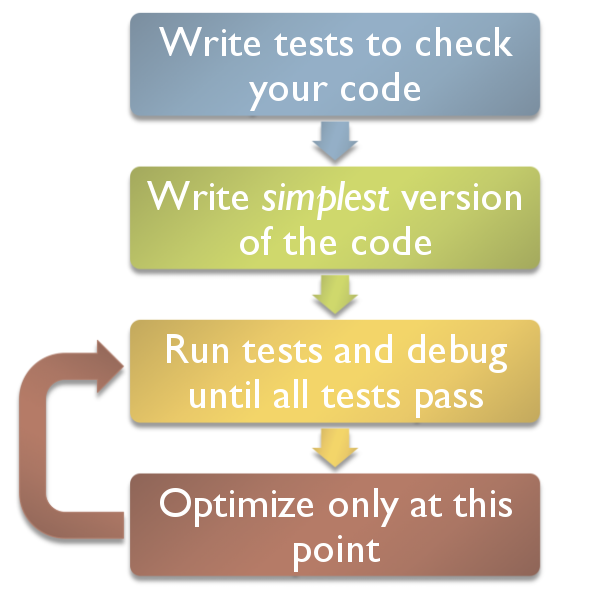

In [4]:
Image("images/agile_development_cycle.png", height=300, width=300)

## Reminder: Testing in agile development
* Formal software testing has become one of the most important parts of modern software development
* Tests become part of the programming cycle and are automated:
 * Write test suite in parallel with your code
 * External software runs the tests and provides reports and statistics

```
test_choice (__main__.TestSequenceFunctions) ... ok
test_sample (__main__.TestSequenceFunctions) ... ok
test_shuffle(__main__.TestSequenceFunctions) ... ok
-------------------------------------------------------
Ran 3 tests in 0.110s
OK
```

Visit https://github.com/Blosc/bcolz for an example af automated testing.

## Testing benefits
* Tests are the only way to trust your code
* Faster development:
 * Bugs are always pinpointed
 * Avoids starting all over again when fixing one part of the code causes a bug somewhere else
* Encourages better code and optimization: code can change, and consistency is assured by tests 

## Example: writing some unit tests

This is an example of unit testing. We are trying to make sure that the function calc_gc properly calculated the gc fraction of the DNA sequence.
Checks to be performed:

1. the sequence contained 'N's
2. the sequence contained lowercase char

In [1]:
%%file calc_gc.py
def calc_gc(sequence):
    sequence = sequence.upper()                    # make all chars uppercase
    n = sequence.count('T') + sequence.count('A')  # count only A, T,
    m = sequence.count('G') + sequence.count('C')  # C, and G -- nothing else (no Ns, Rs, Ws, etc.)
    return float(m) / float(n + m)

def test_1(): # test handling N
    result = round(calc_gc('NATGC'), 2)
    assert result == 0.5, result
    
def test_2(): # test handling lowercase
    result = round(calc_gc('natgc'), 2)
    assert result == 0.5, result

Overwriting calc_gc.py


In [4]:
!pytest calc_gc.py

============================= test session starts ==============================
platform darwin -- Python 3.5.2, pytest-3.0.3, py-1.4.31, pluggy-0.4.0
rootdir: /Users/faltet/cursos/cursos-autonom/Next-Valencia-2016/materials/testing_code, inifile: 
collected 2 items 

calc_gc.py ..

=========================== 2 passed in 0.01 seconds ===========================


### Exercise

Make sure that the code has protection to avoid a division by zero for sequences with no A, T, C, G.

### Solution

## Example: checking numerical results

In this new example we are going to check that some numerical computations:

In [37]:
%%file test_numbers.py
import numpy as np
from numpy.testing import assert_equal
import numexpr as ne

def test_numpy():
    x = np.linspace(0, 5, 100)
    result1 = x**3
    result2 = x*x*x
    assert_equal(result1, result2)
    
def test_numexpr():
    x = np.linspace(0, 5, 100)
    result1 = x**3
    result2 = ne.evaluate("x**3")
    assert_equal(result1, result2)


Overwriting test_numbers.py


In [38]:
!pytest test_numbers.py

============================= test session starts ==============================
platform darwin -- Python 3.5.2, pytest-3.0.3, py-1.4.31, pluggy-0.4.0
rootdir: /Users/faltet/cursos/cursos-autonom/Next-Valencia-2016/materials/testing_code, inifile: 
collected 2 items 

test_numbers.py FF

=================================== FAILURES ===================================
__________________________________ test_numpy __________________________________

    def test_numpy():
        x = np.linspace(0, 5, 100)
        result1 = x**3
        result2 = x*x*x
>       assert_equal(result1, result2)

test_numbers.py:9: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

x = array([  0.00000000e+00,   1.28826269e-04,   1.03061015e-03,
         3.47830926e-03,   8.24488122e-03,   1.61032836e-....07001038e+02,   1.10452422e+02,
         1.13977238e+02,   1.17576257e+02,   1.21250254e+02,
         1.25000000e+02])
y = array([  0.00000000e+00,   1.28826269e-04,   1.03061

Hmm, something is not going on well, so:

### Exercise

What's wrong with the tests above?  Try to fix them.

*Hint:*  You should know that the comparison in floating point is a bit tricky due to small differences in precision.  Try to use another, more convenient,  test function than `assert_equal`.

### Solution

In [19]:
%%file test_primes.py
def is_prime(number):
    """Return True if *number* is prime."""
    for element in range(number):
        if number % element == 0:
            return False
    return True

def test_is_five_prime():
    """Is five successfully determined to be prime?"""
    assert is_prime(5)

Overwriting test_primes.py


In [20]:
!pytest test_primes.py

============================= test session starts ==============================
platform darwin -- Python 3.5.2, pytest-3.0.3, py-1.4.31, pluggy-0.4.0
rootdir: /Users/faltet/cursos/cursos-autonom/Next-Valencia-2016/materials/testing_code, inifile: 
collected 1 items 

test_primes.py F

=================================== FAILURES ===================================
______________________________ test_is_five_prime ______________________________

    def test_is_five_prime():
        """Is five successfully determined to be prime?"""
>       assert is_prime(5)

test_primes.py:10: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

number = 5

    def is_prime(number):
        """Return True if *number* is prime."""
        for element in range(number):
>           if number % element == 0:
E           ZeroDivisionError: integer division or modulo by zero

test_primes.py:4: ZeroDivisionError
=========================== 1 failed in 0.08 seconds ============

### Solution

## Further reading

* [pytest](http://doc.pytest.org/en/latest/) is a mature package for testing
* [coverage](https://coverage.readthedocs.io) for discovering parts of your code that are not covered
* [Tools to efficiently build scientific code](https://python.g-node.org/wiki/_media/2016_testing_debugging_profiling.pdf) Nice tutorial with emphasis en testing.